In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv')

In [3]:
df.head(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [5]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


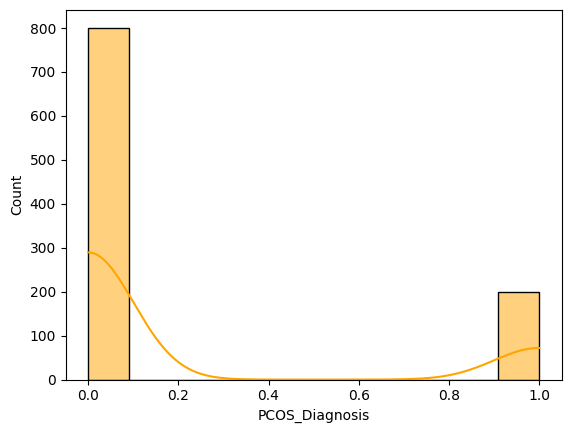

In [8]:
#first we need to understand diagnosis distribution
values = df['PCOS_Diagnosis'].value_counts()
print(values)

sns.histplot(df['PCOS_Diagnosis'],kde=True,color='orange')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


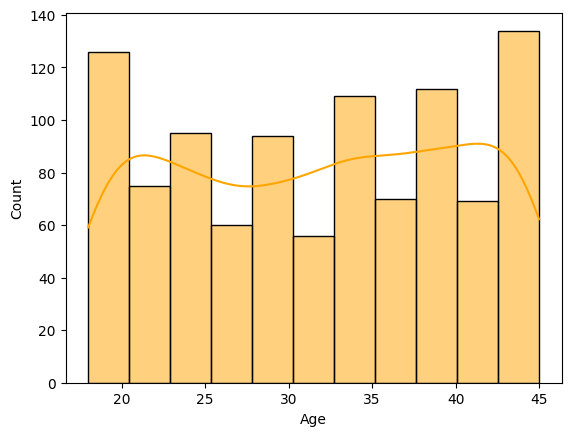

In [9]:
sns.histplot(df['Age'],kde=True,color='orange')
plt.show()

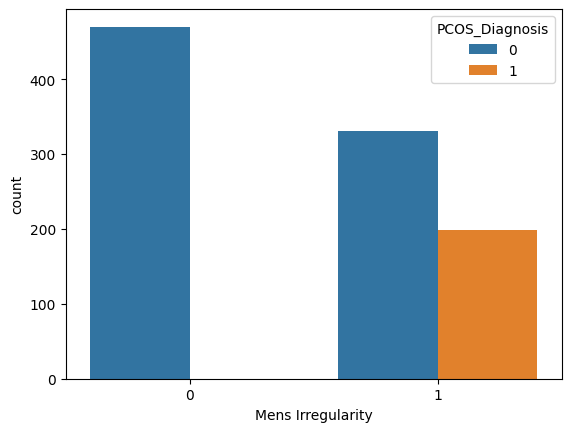

In [10]:
#No we need to check how mens irregularity imapct on pCOS
sns.countplot(x='Menstrual_Irregularity',hue='PCOS_Diagnosis',data=df)
plt.xlabel('Mens Irregularity')
plt.show()

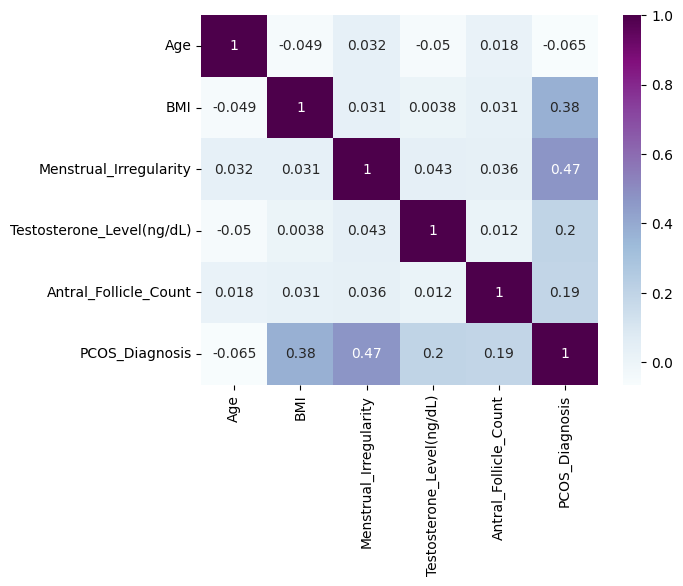

In [11]:
#correlation check

corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BuPu')
plt.show()

## Transforming Our Data

In [12]:
df.head(10)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
5,38,19.3,0,28.4,6,0
6,24,20.2,1,72.5,29,0
7,43,20.2,1,85.8,17,0
8,36,20.6,0,50.4,5,0
9,40,20.4,0,82.0,21,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [14]:
new_df = df.copy()

In [15]:
new_df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


## Here we will take two data divisions one data we will scale only for AGE, Antral_Follicle and in another we will scale every item

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mx = MinMaxScaler()

In [18]:
df[['Age','Antral_Follicle_Count']] = mx.fit_transform(
    df[['Age', 'Antral_Follicle_Count']]
)

In [19]:
df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,0.222222,34.7,1,25.2,0.625000,0
1,0.703704,26.4,0,57.1,0.833333,0
2,0.518519,23.6,0,92.7,0.958333,0
3,0.370370,28.8,0,63.1,0.875000,0
4,0.259259,22.1,1,59.8,0.125000,0
...,...,...,...,...,...,...
995,0.592593,18.4,1,95.7,0.750000,0
996,1.000000,28.9,1,28.5,0.083333,0
997,0.703704,28.3,0,32.4,0.958333,0
998,0.851852,27.3,0,95.6,0.166667,0


In [20]:
X = df.drop(columns=['PCOS_Diagnosis'])
Y = df['PCOS_Diagnosis']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=32)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = 5))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7983 - loss: 1.8023 - val_accuracy: 0.5125 - val_loss: 0.7165
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.5980 - val_accuracy: 0.7688 - val_loss: 0.4979
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5431 - val_accuracy: 0.7937 - val_loss: 0.5360
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7833 - loss: 0.4866 - val_accuracy: 0.7937 - val_loss: 0.4798
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4636 - val_accuracy: 0.7937 - val_loss: 0.4743
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.4322 - val_accuracy: 0.7937 - val_loss: 0.4707
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.4552 - val_accuracy: 0.7937 - val_loss: 0.4729
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: 0.4465 - val_accuracy: 0.7937 - 

In [28]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [29]:
y_pred = y_pred.argmax(axis=-1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.78

## So i got the accuracy of 78 Percent initially